In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000,
                  n_features=64,
                  centers=10,
                  center_box=(-1, +1))

print(X.shape, y.shape)

(1000, 64) (1000,)


In [8]:
X[0]

array([ 0.72149441,  0.2733086 ,  1.92463933, -0.4298607 ,  0.17966447,
        0.44537765,  1.37251765,  0.02183361,  0.15854955, -0.07949238,
        2.2359138 , -2.20982436, -0.91588743, -0.21209958, -1.2276335 ,
       -1.00748614,  1.49350473, -1.58849946,  0.69643067,  1.84680616,
        0.79831295,  0.02231998,  0.30364649,  0.9902231 , -1.19993552,
        0.16523219, -0.45654493, -1.38084034, -0.04625101,  1.41661547,
       -0.78067923,  0.62907839,  1.95397478,  1.29574463,  0.45178701,
       -0.54337191,  0.90214896,  0.74300801,  0.40402104,  1.43799269,
        0.33867562, -0.77822992,  1.52864998, -0.94539852,  0.62336939,
        1.00698843, -1.07820173,  1.53176137,  0.34486839, -0.15346139,
        0.04281939,  0.9399386 , -1.37059765,  0.34531898,  1.54382438,
       -1.43684057, -1.14709547, -0.98614941,  1.88186388, -1.09323615,
        1.99060651,  2.10432592, -0.96517039, -0.08031724])

In [9]:
y[0:5]

array([1, 6, 0, 4, 3])

### Visualize

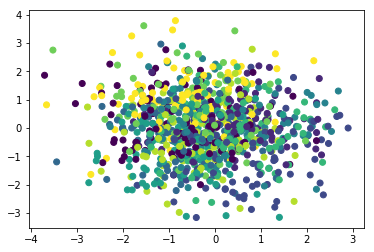

In [10]:
## 2차원 이상은 시각화가 무의미함
# plt.scatter(X[:, 0], X[:, 1], c=y.ravel())

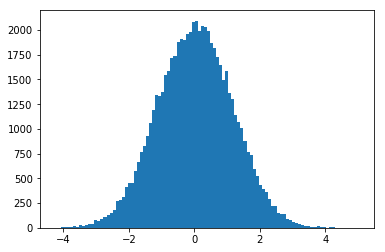

In [11]:
X.mean(), X.min(), X.max()

plt.hist(X.ravel(), bins=100)

tmp = 3

## Preprocessing

### One Hot Encode Label

In [12]:
y_hot = np.eye(10)[y]

print(y.shape, y_hot.shape)
y_hot[:10]

(1000,) (1000, 10)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Define Activate Functions

### Sigmoid

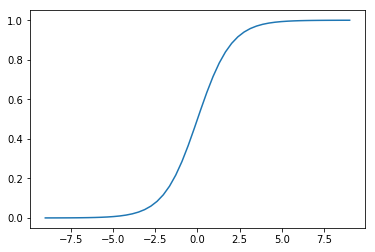

In [13]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(-9, +9)
yy = sigmoid(xx)

plt.plot(xx, yy)

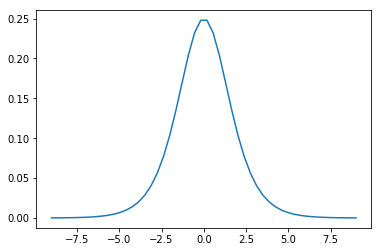

In [57]:
def sigmoid_derivative(n):
    sig = sigmoid(n)
    return sig * (1 - sig)

xx = np.linspace(-9, +9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### tanh

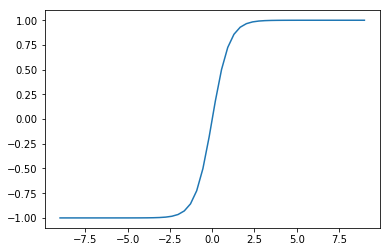

In [58]:
def tanh(x):
    return np.tanh(x)

xx = np.linspace(-9, +9)
yy = tanh(xx)

plt.plot(xx, yy)

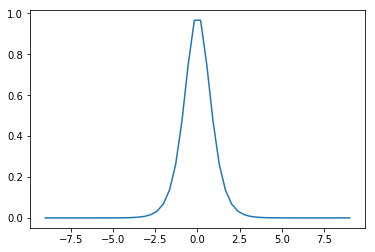

In [59]:
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

xx = np.linspace(-9, +9)
yy = tanh_derivative(xx)

plt.plot(xx, yy)

### ReLU

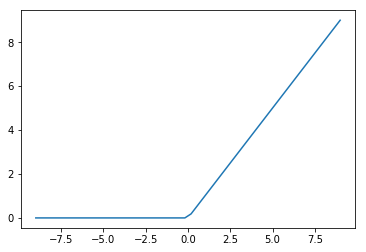

In [60]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

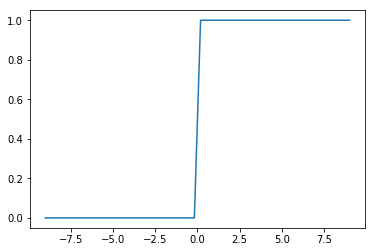

In [61]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

### Cross Entropy

In [62]:
def cross_entropy(actual, predict, eps=1e-15):
    actual = np.array(actual)
    predict = np.array(predict)

    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)

    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

### Plot

In [63]:
def plot_a(as_, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=9)
    figure.set_size_inches(24, 4)

    axes[0].hist(as_[0].ravel(), bins=100, range=range_)
    axes[1].hist(as_[1].ravel(), bins=100, range=range_)
    axes[2].hist(as_[2].ravel(), bins=100, range=range_)
    axes[3].hist(as_[3].ravel(), bins=100, range=range_)
    axes[4].hist(as_[4].ravel(), bins=100, range=range_)
    axes[5].hist(as_[5].ravel(), bins=100, range=range_)
    axes[6].hist(as_[6].ravel(), bins=100, range=range_)
    axes[7].hist(as_[7].ravel(), bins=100, range=range_)
    axes[8].hist(as_[8].ravel(), bins=100, range=range_)

In [64]:
def plot_dzs(dzs, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=8)
    figure.set_size_inches(24, 4)

    axes[0].hist(dzs[0].ravel(), bins=100, range=range_)
    axes[1].hist(dzs[1].ravel(), bins=100, range=range_)
    axes[2].hist(dzs[2].ravel(), bins=100, range=range_)
    axes[3].hist(dzs[3].ravel(), bins=100, range=range_)
    axes[4].hist(dzs[4].ravel(), bins=100, range=range_)
    axes[5].hist(dzs[5].ravel(), bins=100, range=range_)
    axes[6].hist(dzs[6].ravel(), bins=100, range=range_)
    axes[7].hist(dzs[7].ravel(), bins=100, range=range_)

### Build a Model

In [65]:
from time import time

def train(X, y, num_epoch, learning_rate, weight_initializer, activation, activation_derivative):
    w1 = weight_initializer(64, 100)
    w2 = weight_initializer(100, 100)
    w3 = weight_initializer(100, 100)
    w4 = weight_initializer(100, 100)
    w5 = weight_initializer(100, 100)
    w6 = weight_initializer(100, 100)
    w7 = weight_initializer(100, 100)
    w8 = weight_initializer(100, 100)
    w9 = weight_initializer(100, 10)
    
    b1 = np.zeros((1, 100))
    b2 = np.zeros((1, 100))
    b3 = np.zeros((1, 100))
    b4 = np.zeros((1, 100))
    b5 = np.zeros((1, 100))
    b6 = np.zeros((1, 100))
    b7 = np.zeros((1, 100))
    b8 = np.zeros((1, 100))
    b9 = np.zeros((1, 10))

    history = []
    start = time()
    
    for epoch in range(num_epoch):
        z1 = X.dot(w1) + b1
        a1 = activation(z1)
        z2 = a1.dot(w2) + b2
        a2 = activation(z2)
        z3 = a2.dot(w3) + b3
        a3 = activation(z3)
        z4 = a3.dot(w4) + b4
        a4 = activation(z4)
        z5 = a4.dot(w5) + b5
        a5 = activation(z5)

        z6 = a5.dot(w6) + b6
        a6 = activation(z6)
        z7 = a6.dot(w7) + b7
        a7 = activation(z7)
        z8 = a7.dot(w8) + b8
        a8 = activation(z8)
        z9 = a8.dot(w9) + b9
        a9 = sigmoid(z9)

        y_predict = np.argmax(a9, axis=1)
        accuracy = (y_predict == y).mean()
        
        loss = cross_entropy(y_hot, a9)

        history.append({
            'epoch': epoch,
            'elapsed': time() - start,
            'accuracy': accuracy,
            'loss': loss,
        })

        if epoch % (num_epoch / 10) == 0:
            print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

        if accuracy > 0.99:
            break

        d9 = (a9 - y_hot)

        d8 = d9.dot(w9.T) * activation_derivative(a8)
        d7 = d8.dot(w8.T) * activation_derivative(a7)
        d6 = d7.dot(w7.T) * activation_derivative(a6)
        d5 = d6.dot(w6.T) * activation_derivative(a5)
        d4 = d5.dot(w5.T) * activation_derivative(a4)
        d3 = d4.dot(w4.T) * activation_derivative(a3)
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w9 = w9 - learning_rate * a8.T.dot(d9)
        w8 = w8 - learning_rate * a7.T.dot(d8)
        w7 = w7 - learning_rate * a6.T.dot(d7) 
        w6 = w6 - learning_rate * a5.T.dot(d6)
        w5 = w5 - learning_rate * a4.T.dot(d5)
        w4 = w4 - learning_rate * a3.T.dot(d4)
        w3 = w3 - learning_rate * a2.T.dot(d3) 
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

        b9 = b9 - d9.mean(axis=0)
        b8 = b8 - d8.mean(axis=0)
        b7 = b7 - d7.mean(axis=0)
        b6 = b6 - d6.mean(axis=0)
        b5 = b5 - d5.mean(axis=0)
        b4 = b4 - d4.mean(axis=0)
        b3 = b3 - d3.mean(axis=0)
        b2 = b2 - d2.mean(axis=0)
        b1 = b1 - d1.mean(axis=0)

    print("----" * 10)
    print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))
   
    dz2 = activation_derivative(z1).dot(w2) # dz2 / dz1
    dz3 = activation_derivative(z2).dot(w3) # dz3 / dz2
    dz4 = activation_derivative(z3).dot(w4) # dz4 / dz3
    dz5 = activation_derivative(z4).dot(w5) # dz5 / dz4
    dz6 = activation_derivative(z5).dot(w6) # dz6 / dz5
    dz7 = activation_derivative(z6).dot(w7) # dz7 / dz6
    dz8 = activation_derivative(z7).dot(w8) # dz8 / dz7
    dz9 = activation_derivative(z8).dot(w9) # dz9 / dz8
    
    as_ = [a1, a2, a3, a4, a5, a6, a7, a8, a9]
    dzs = [dz2, dz3, dz4, dz5, dz6, dz7, dz8, dz9]

    return accuracy, as_, dzs, history


### Case 1 - Small Random Number + Sigmoid

In [66]:
# Write code here!
def small_random_number(fan_in, fan_out):
    return np.random.uniform(low = -1.0, high = +1.0, size = (fan_in, fan_out))

num_epoch = 100
learning_rate = 0.0003

accuracy, as_, dzs, sigmoid_history = train(X, y, num_epoch, learning_rate, 
                                            weight_initializer = small_random_number, 
                                            activation = sigmoid, 
                                            activation_derivative = sigmoid_derivative)

  0 accuracy = 0.10000, loss = 0.83231


/Users/daejune/anaconda3/envs/dsschool/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 10 accuracy = 0.10000, loss = 0.72011
 20 accuracy = 0.18700, loss = 0.32903
 30 accuracy = 0.17200, loss = 0.29817
 40 accuracy = 0.15700, loss = 0.34254
 50 accuracy = 0.17200, loss = 0.31101
 60 accuracy = 0.13400, loss = 0.32692
 70 accuracy = 0.16200, loss = 0.30356
 80 accuracy = 0.15900, loss = 0.29844
 90 accuracy = 0.15900, loss = 0.29633
----------------------------------------
 99 accuracy = 0.19300, loss = 0.29213


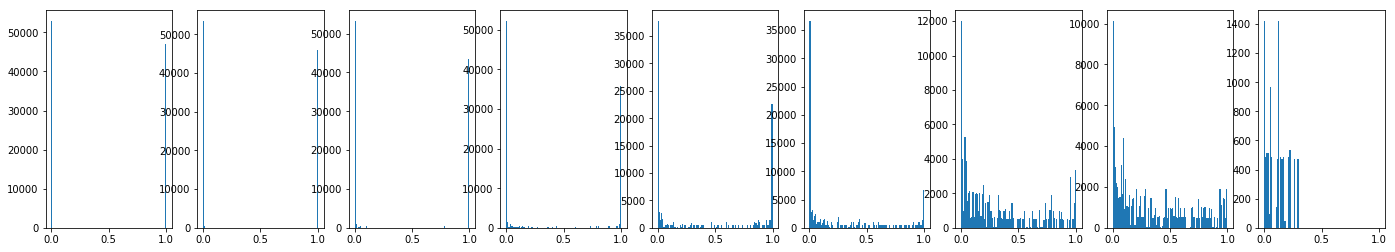

In [67]:
plot_a(as_, range_ = (0.0, 1.0))

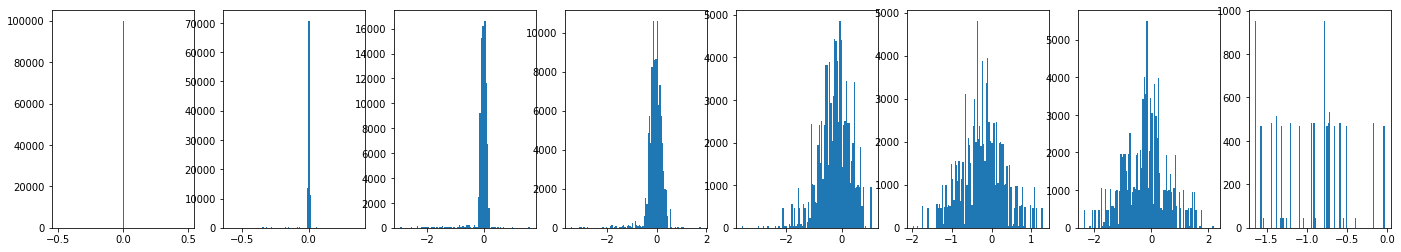

In [68]:
plot_dzs(dzs)

### Case 2 - Small Random Number + tanh

In [69]:
# Write code here!
num_epoch = 100
learning_rate = 0.0003

accuracy, as_, dzs, tanh_history = train(X, y, num_epoch, learning_rate, 
                                            weight_initializer = small_random_number, 
                                            activation = tanh, 
                                            activation_derivative = tanh_derivative)

  0 accuracy = 0.11300, loss = 2.30538
 10 accuracy = 0.10000, loss = 5.76522
 20 accuracy = 0.10000, loss = 1.65127
 30 accuracy = 0.10000, loss = 1.47211
 40 accuracy = 0.10000, loss = 1.70075
 50 accuracy = 0.10000, loss = 1.86910
 60 accuracy = 0.10000, loss = 1.70081
 70 accuracy = 0.10000, loss = 1.03618
 80 accuracy = 0.10000, loss = 1.60407
 90 accuracy = 0.10000, loss = 0.91658
----------------------------------------
 99 accuracy = 0.10000, loss = 1.19045


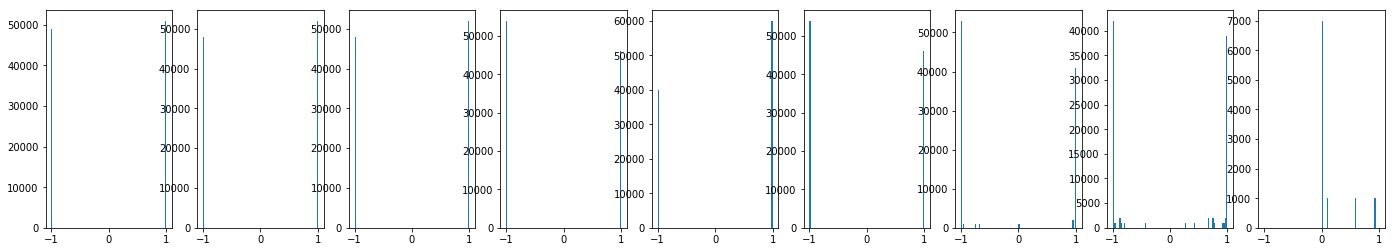

In [70]:
plot_a(as_, range_ = (-1.0, 1.0))

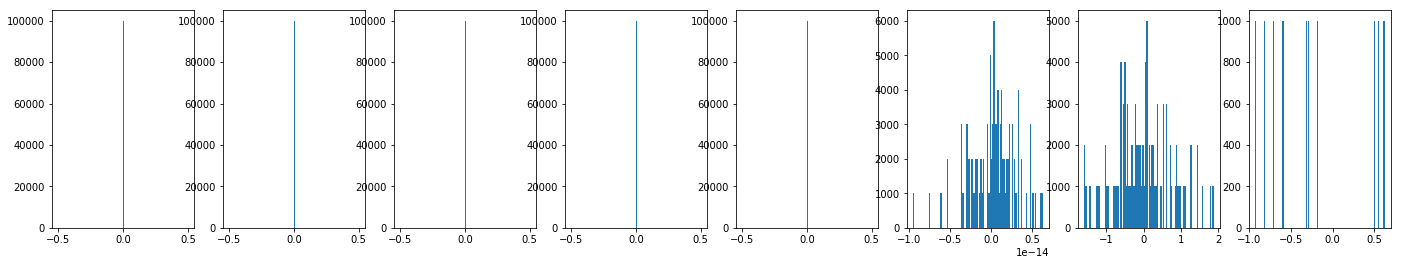

In [71]:
plot_dzs(dzs)

### Case 3 - Xavior Initialization + tanh

In [90]:
# Write code here!
def xavior_initialization(fan_in, fan_out):
    a = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(low = -a, high = +a, size = (fan_in, fan_out))

num_epoch = 100
learning_rate = 0.0003

accuracy, as_, dzs, xavior_tanh_history = train(X, y, num_epoch, learning_rate, 
                                                weight_initializer = xavior_initialization, 
                                                activation = tanh, 
                                                activation_derivative = tanh_derivative)

  0 accuracy = 0.08300, loss = 0.71100
 10 accuracy = 0.54500, loss = 0.20984
 20 accuracy = 0.95700, loss = 0.07557
----------------------------------------
 25 accuracy = 0.99200, loss = 0.04662


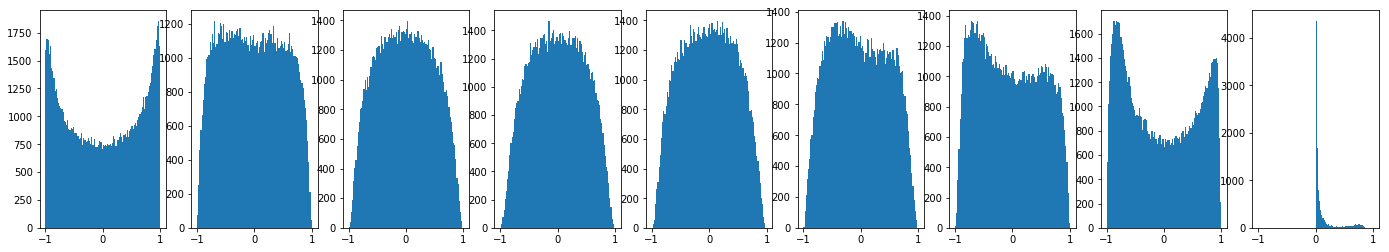

In [80]:
plot_a(as_, range_ = (-1.0, 1.0))

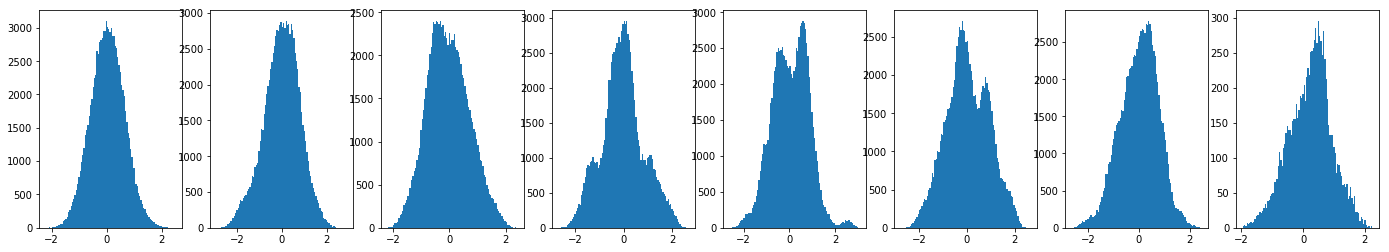

In [81]:
plot_dzs(dzs)

### Visualize

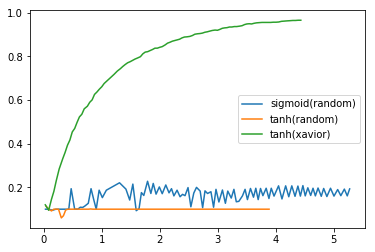

In [82]:
# Write code here!
import pandas as pd

sigmoid_history = pd.DataFrame(sigmoid_history)
tanh_history = pd.DataFrame(tanh_history)
xavior_tanh_history = pd.DataFrame(xavior_tanh_history)

plt.plot(sigmoid_history['elapsed'], sigmoid_history['accuracy'], label="sigmoid(random)")
plt.plot(tanh_history['elapsed'], tanh_history['accuracy'], label="tanh(random)")
plt.plot(xavior_tanh_history['elapsed'], xavior_tanh_history['accuracy'], label="tanh(xavior)")

plt.legend()

### Case 4 - Xavior Initialization + ReLU

In [83]:
# Write code here!
num_epoch = 100
learning_rate = 0.00003

accuracy, as_, dzs, xavior_relu_history = train(X, y, num_epoch, learning_rate, 
                                                weight_initializer = xavior_initialization, 
                                                activation = relu, 
                                                activation_derivative = relu_derivative)

  0 accuracy = 0.10200, loss = 0.68736
 10 accuracy = 0.13900, loss = 0.32466
 20 accuracy = 0.22000, loss = 0.32315
 30 accuracy = 0.26800, loss = 0.32194
 40 accuracy = 0.31100, loss = 0.32058
 50 accuracy = 0.33500, loss = 0.31854
 60 accuracy = 0.38700, loss = 0.31565
 70 accuracy = 0.42600, loss = 0.31115
 80 accuracy = 0.43800, loss = 0.30407
 90 accuracy = 0.45800, loss = 0.29295
----------------------------------------
 99 accuracy = 0.47900, loss = 0.27883


### Case 5 - He Initialization + ReLU

In [84]:
# Write code here!
def he_initialization(fan_in, fan_out):
    a = np.sqrt(6 / fan_in)
    return np.random.uniform(low = -a, high = +a, size = (fan_in, fan_out))

num_epoch = 100
learning_rate = 0.00003

accuracy, as_, dzs, he_relu_history = train(X, y, num_epoch, learning_rate, 
                                                weight_initializer = he_initialization, 
                                                activation = relu, 
                                                activation_derivative = relu_derivative)

  0 accuracy = 0.10200, loss = 0.75735
 10 accuracy = 0.33000, loss = 0.29025
 20 accuracy = 0.41300, loss = 0.27218
 30 accuracy = 0.61200, loss = 0.20763
 40 accuracy = 0.70800, loss = 0.16845
 50 accuracy = 0.70100, loss = 0.15176
 60 accuracy = 0.87100, loss = 0.08912
 70 accuracy = 0.89700, loss = 0.06669
 80 accuracy = 0.95800, loss = 0.04050
 90 accuracy = 0.84300, loss = 0.08801
----------------------------------------
 99 accuracy = 0.98400, loss = 0.02225


### Visualize

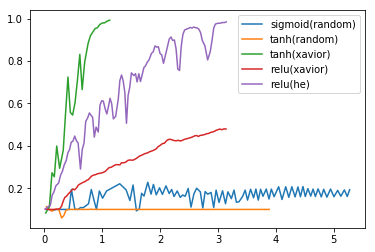

In [91]:
# Write code here!
sigmoid_history = pd.DataFrame(sigmoid_history)
tanh_history = pd.DataFrame(tanh_history)
xavior_tanh_history = pd.DataFrame(xavior_tanh_history)
xavior_relu_history = pd.DataFrame(xavior_relu_history)
he_relu_history = pd.DataFrame(he_relu_history)

plt.plot(sigmoid_history['elapsed'], sigmoid_history['accuracy'], label="sigmoid(random)")
plt.plot(tanh_history['elapsed'], tanh_history['accuracy'], label="tanh(random)")
plt.plot(xavior_tanh_history['elapsed'], xavior_tanh_history['accuracy'], label="tanh(xavior)")
plt.plot(xavior_relu_history['elapsed'], xavior_relu_history['accuracy'], label="relu(xavior)")
plt.plot(he_relu_history['elapsed'], he_relu_history['accuracy'], label="relu(he)")

plt.legend()